In [1]:
!pip install qiskit
!pip install qiskit-aer
import qiskit
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import SamplerV2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 43.0 MB/s eta 0:00:00


# **Create a Quantum Circuit with a Hadamard Gate**

- Write a Qiskit program to create a single-qubit circuit.
- Apply a Hadamard gate to the qubit.
- Measure the qubit and visualize the result using a histogram.

In [5]:
#Insert the code here

# initialize the circuit
circ = qiskit.QuantumCircuit(1)

# Apply Hadamard date
circ.h(0)

# measure the qubit
circ.measure_all()

# Visualize the ciruit
circ.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

Counts(ideal): {'0': 59, '1': 69}


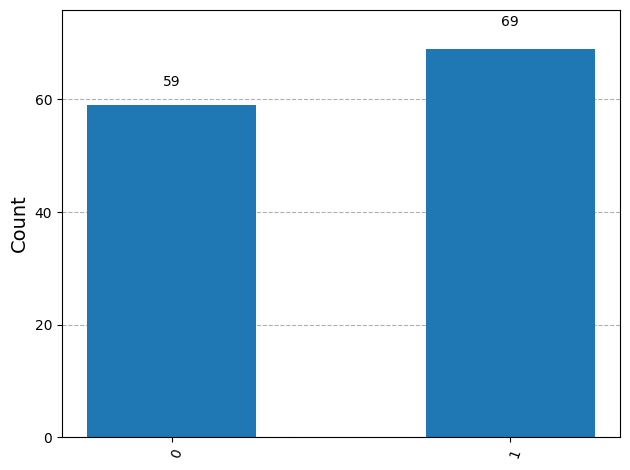

In [7]:
# visualize the result using a histogram.
sampler = SamplerV2()
job = sampler.run([circ], shots=128)

# perform ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

# print the measurment
print('Counts(ideal):', counts_ideal)

# plot the histogram
plot_histogram(counts_ideal)

# **Implement a Quantum Coin Flip**
- Simulate a fair coin flip using a quantum circuit.
- Print the probability of getting Heads or Tails.

In [8]:
# Intialize the quantum circuit with one quibit
circ = qiskit.QuantumCircuit(1)

"""
create a hadamrd gate since it creates a superposititon that ensure 50/50 chance for 0 and 1
same as a fair coin flip

and measure the qubit
"""
circ.h(0)
circ.measure_all()

# Visualize the circuit
print("Quantum Circuit for Coin Flip:")
circ.draw()

Quantum Circuit for Coin Flip:


┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

In [29]:

sampler = SamplerV2()
job = sampler.run([circ], shots=128)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

# Calculate probabilities
total_shots = sum(counts_ideal.values())
prob_heads = counts_ideal.get('0', 0) / total_shots
prob_tails = counts_ideal.get('1', 0) / total_shots

"""
Print the probabilities
let |0⟩ be heads and |1⟩ be tails
"""
print(f"Probability of Heads (|0⟩): {prob_heads:.3f} ~ {(prob_heads * 100)}%")
print(f"Probability of Tails (|1⟩): {prob_tails:.3f} ~ {(prob_tails * 100)}%")



Probability of Heads (|0⟩): 0.547 ~ 54.6875%
Probability of Tails (|1⟩): 0.453 ~ 45.3125%


Expected Output:
<br>
Probability of Heads (|0⟩): 0.500 ~ 50%
<br>
Probability of Tails (|1⟩): 0.500 ~ 50%
<br>
**Note:** The Result could be different but in the range of (40 - 60)%


# Technical Explanation

### Superposition
The **Hadamard gate** creates the superposition state ∣+⟩, ensuring a 50/50 chance for ∣0⟩ and ∣1⟩.

### Measurement
We map:
- ∣0⟩ → **Heads**
- ∣1⟩ → **Tails**

### Probabilities
Calculated from the measurement counts. With 128 shots, the probabilities should be close to **0.5** ~ **50%** for both outcomes.


# **Implement a Bell State (Entanglement)**
- Create a two-qubit circuit.
- Apply a Hadamard gate to the first qubit and a CNOT gate between the two qubits.
- Measure both qubits and verify if they are always correlated.

In [31]:
# Initialize a quantum circuit with two qubits
circ = qiskit.QuantumCircuit(2)

# Apply Hadamard gate to the first qubit
circ.h(0)

# Apply CNOT gate to entangle the qubits Measure both qubits
circ.cx(0, 1)
circ.measure_all()

# Visualize the circuit
print("Quantum Circuit for Bell State:")
circ.draw()

Quantum Circuit for Bell State:


┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

Counts(ideal): {'00': 77, '11': 51}


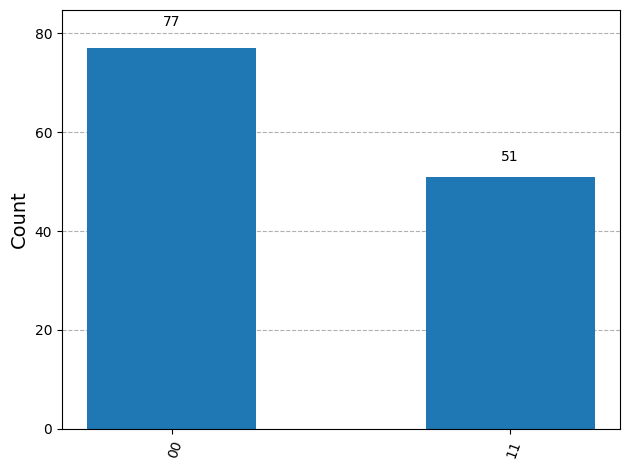

In [32]:
sampler = SamplerV2()
job = sampler.run([circ], shots=128)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

# Print the ideal measurement results
print('Counts(ideal):', counts_ideal)

# Visualize the results as a histogram
plot_histogram(counts_ideal)

## Technical Explanation

+ ##### **Hadamard Gate** Creates a **superposition** on the first qubit:  


+ ##### CNOT Gate **Entangles** the qubits.

+ ##### Measurement Should yield only ∣00⟩ or ∣11⟩, confirming **entanglement**.

# **Generate Plus state**
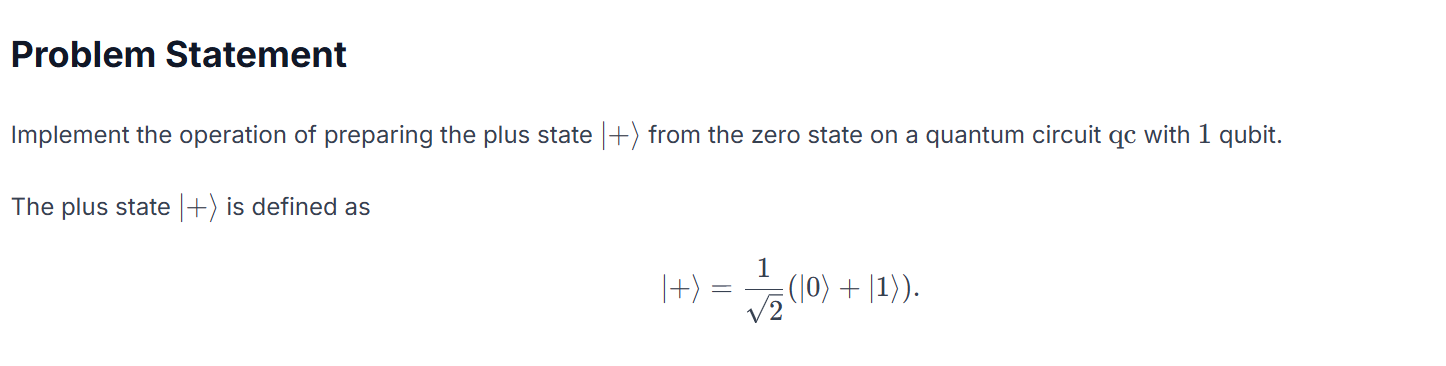

In [33]:
# Initialize a quantum circuit with one qubit
circ = qiskit.QuantumCircuit(1)

# Apply Hadamard gate (H) to create the |+⟩ state
circ.h(0)

# Measure the qubit to verify the state
circ.measure_all()

# Visualize the circuit
print("Quantum Circuit for |+⟩ State:")
circ.draw()

Quantum Circuit for |+⟩ State:


┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

Counts(ideal): {'0': 68, '1': 60}


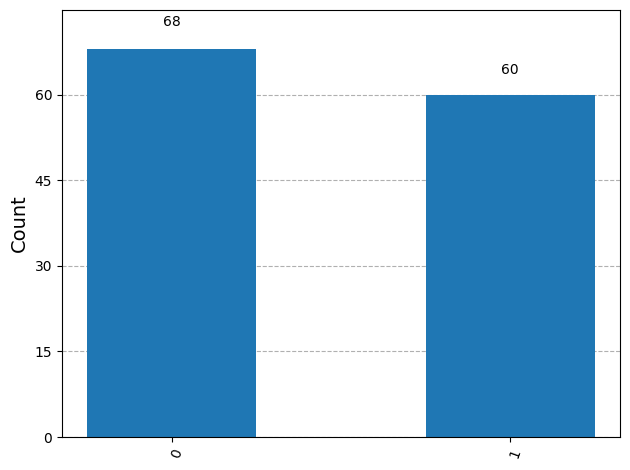

In [35]:
sampler = SamplerV2()
job = sampler.run([circ], shots=128)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

# Print the ideal measurement results
print('Counts(ideal):', counts_ideal)
plot_histogram(counts_ideal)

## Technical Explanation

- **Hadamard Gate**: Directly creates the state 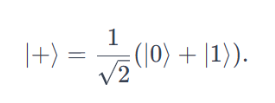.

- **Measurement**: Confirms the state by showing equal probabilities.

- **Histogram**: Should display a balanced distribution,  
  matching the definition of the state.


# **Theory Checkins**

### **How does superposition affect the information processing capabilities of a quantum computer?**

Superposition is very important for quantum computer because it can do many things at same time like a qubit can be in superposition, so it is 0 and 1 together. This is not like normal computer where bit is only 0 or 1.
 <br> If we have 𝑛 qubits, quantum computer can be in 2^𝑛 states all at once. This is why it can do parallel work.<br>
 so it is faster than normal computer. But when we measure, the superposition goes away, and we get only one answer. So, we must use something called interference to make the right answer more possible before we measure. <br>

 This are key to algorithms like Grover’s search, which achieves a quadratic speedup by evaluating all possibilities in superposition.

###How do quantum gates manipulate interference to solve problems faster than classical computers?

Quantum gates are like tools to change quantum states, and they make interference to help solve problems faster. In training, First, Hadamard gate makes superposition, so qubit is in many states at once. Then, there is something called Pauli-X gate (X) changes the phase of the state we want to find. This interference makes the amplitude of the right answer bigger, so we more likely to get it when we measure. I think this is faster because quantum computer can do this in 𝑂(sqrt(𝑁)) steps, but normal computer need O(N)
steps. Interference is special for quantum computer—it helps focus on correct answer, not like classical computer.

### How does measurement collapse a quantum state, and why is it important in quantum computing algorithms?

Measurement in quantum computer is when we look at the qubit, and it changes. Before measure, qubit can be in superposition, like:
$
\alpha \lvert 0 \rangle + \beta \lvert 1 \rangle
$
so it has both \(0\) and \(1\).
 sBut when we measure, it become only:
$
\lvert 0 \rangle \quad \text{or} \quad \lvert 1 \rangle
$. <br> The chance to get \($\lvert 0 \rangle $\) is \( $\lvert \alpha \rvert^2 $\), and for \($ \lvert 1 \rangle $\) is \( $ \lvert \beta \rvert^2 $ \). This is called collapse, and after collapse, superposition is gone.

In training, we make Bell state with two qubits, and when we measure, we see
$
\lvert 00 \rangle \quad \text{or} \quad \lvert 11 \rangle
$

always same for both qubits because they are entangled.<br> Measurement is important because it give us the result of quantum algorithm. But we must be careful—superposition is gone after measure, so we need to make sure the right answer has big chance before we measure.
